# 💻 Laboratory Task 5
### EEG Signal Labeling Using Python (Alternative to MATLAB Signal Labeler App)
**Submitted by:** Rekha R  
**Enrollment No.:** MT23AAI063

#### Note: Due to unresolved issues with the WFDB toolbox and Java dependencies in MATLAB, the EEG signal labeling task has been implemented using Python in Google Colab. Equivalent functionality is achieved using the mne library for signal visualization and annotation.

In [ ]:
#Load the data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install mne matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 50.9 MB/s eta 0:00:00


Extracting EDF parameters from /content/drive/MyDrive/eeg-motor-movementimagery/files/S001/S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Plotting: S001R02.edf


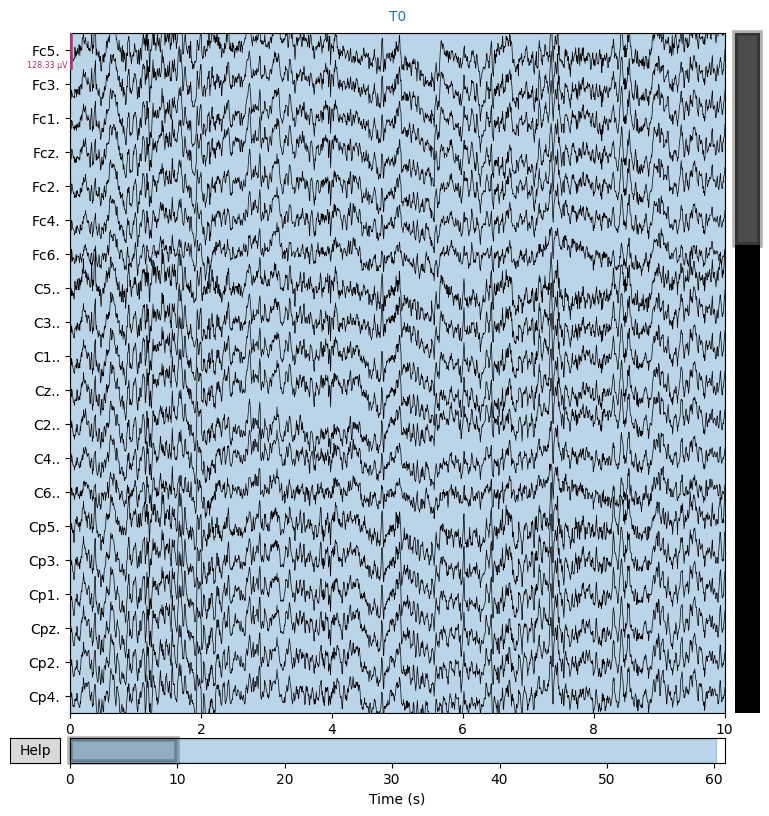

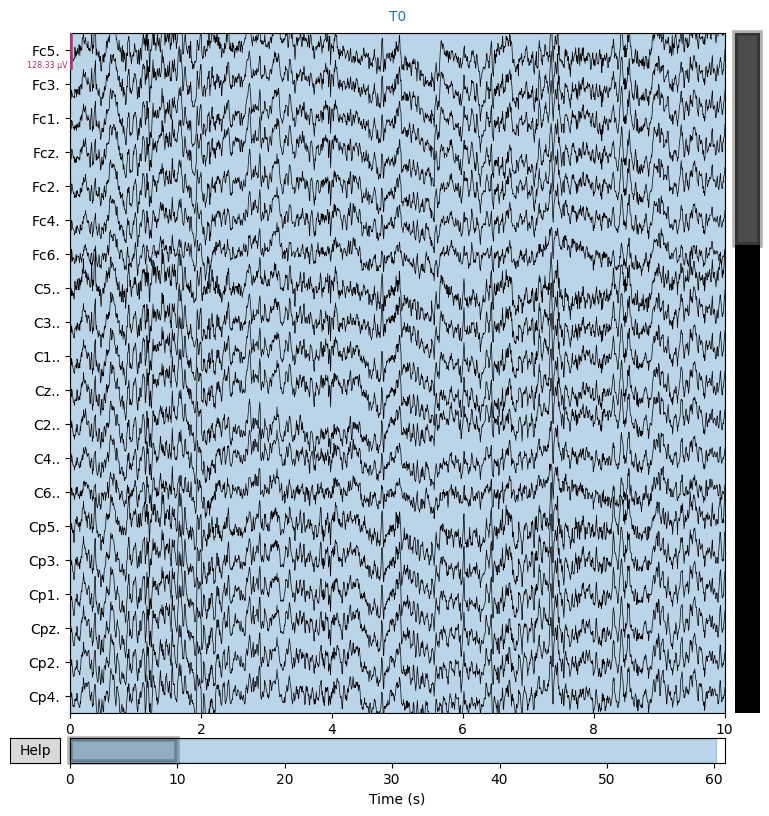

In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Load sample EEG data
# Replace this with your actual .edf file path
eeg_file = '/content/drive/MyDrive/eeg-motor-movementimagery/files/S001/S001R02.edf'
raw = mne.io.read_raw_edf(eeg_file, preload=True)
print(f"Plotting: {file}")
raw.plot(scalings='auto', title=file)

In [ ]:
# Filter to target alpha (8–13 Hz) or beta (13–30 Hz) waves
alpha_band = raw.copy().filter(8., 13., fir_design='firwin')
beta_band = raw.copy().filter(13., 30., fir_design='firwin')


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 265 samples (1.656 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge:

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [ ]:
# Define Region of Interest (simulate ROIs manually for now)
events = mne.make_fixed_length_events(raw, duration=5.0)
annotations = mne.Annotations(onset=events[:, 0] / raw.info['sfreq'],
                              duration=[5.0] * len(events),
                              description=['ROI'] * len(events))
raw.set_annotations(annotations)

<RawEDF | S001R02.edf, 64 x 9760 (61.0 s), ~4.8 MiB, data loaded>

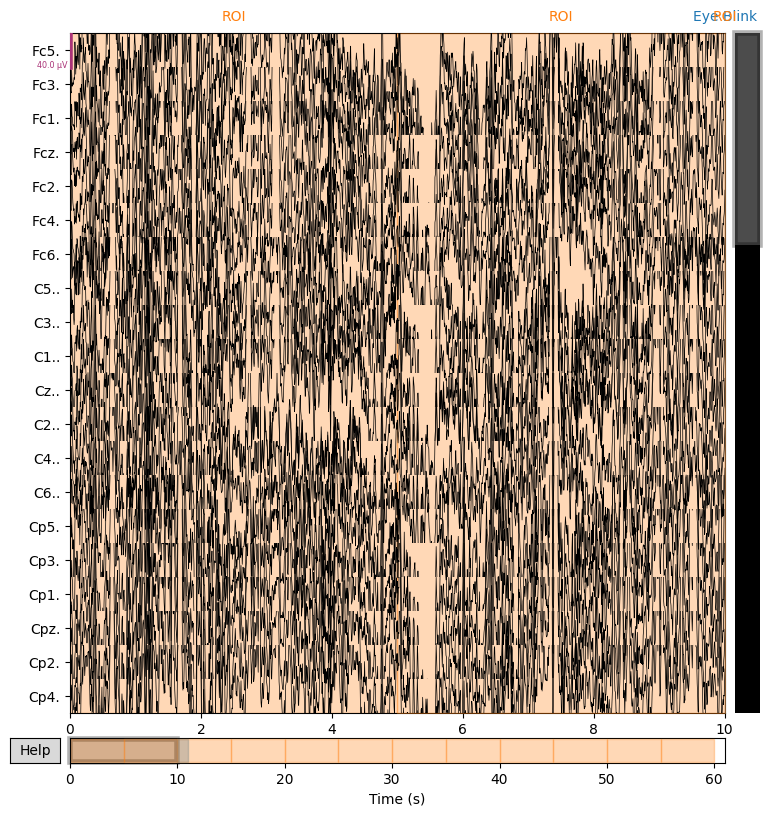

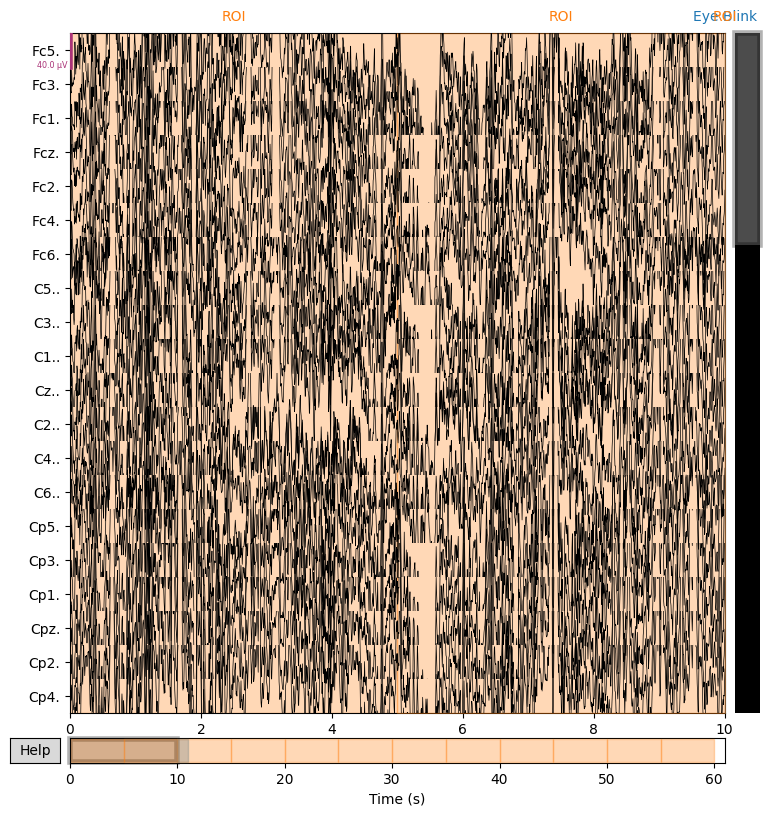

In [ ]:
# Get the original recording time
orig_time = raw.annotations.orig_time

# Create a custom annotation (e.g., simulate an eye blink)
blink_onset = 10  # 10 seconds after start
blink_duration = 1.0  # duration in seconds

blink = mne.Annotations(
    onset=[blink_onset],
    duration=[blink_duration],
    description=['Eye Blink'],
    orig_time=orig_time  # <-- MATCH THE ORIGINAL TIME
)

# Add the custom annotation
raw.set_annotations(raw.annotations + blink)

# Optional: plot with annotations
raw.plot()


In [ ]:
# Save labeled data
raw.save('/content/labeled_eeg_raw.fif', overwrite=True)

Writing /content/labeled_eeg_raw.fif
Closing /content/labeled_eeg_raw.fif
[done]


[PosixPath('/content/labeled_eeg_raw.fif')]

In [ ]:
# Export annotations
annotations_df = raw.annotations.to_data_frame()
annotations_df.to_csv('/content/labeled_annotations.csv', index=False)